# 09-Projeto-09-Solving-CIFAR-10

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import PIL
import pickle
import os
import tarfile

In [4]:
# path = 'datasets/cifar-100-python.tar.gz'
# tar = tarfile.open(path, 'r:gz')
# tar.extractall('datasets/')
# tar.close()

In [125]:

# with open ('datasets/cifar-100-python/train'.format(name), mode='rb') as training_data:
#     train = pickle.load(training_data, encoding='bytes')

    
# with open ('datasets/cifar-100-python/test'.format(name), mode='rb') as testing_data:
#     test = pickle.load(testing_data, encoding='bytes')

    
# X_train, y_train = train[b'data'], train[b'fine_labels']
# X_test, y_test = test[b'data'], test[b'fine_labels']


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 1304s 8us/step


/home/dsntos/.local/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


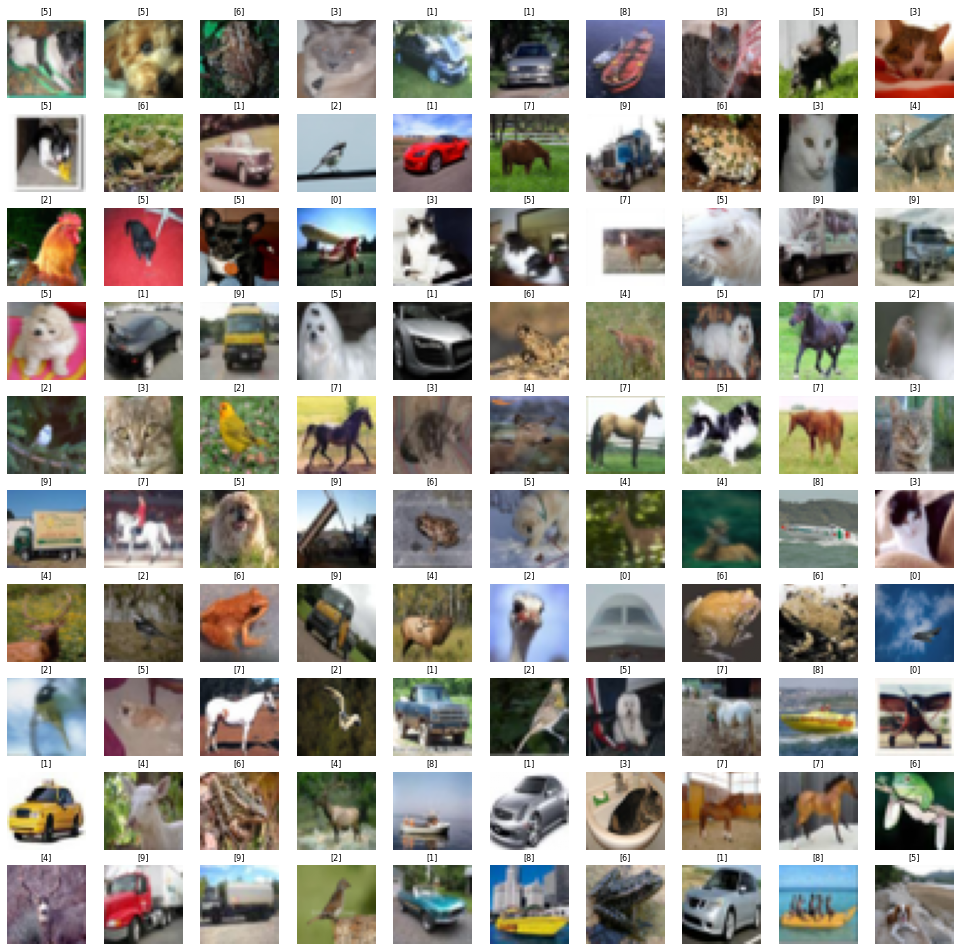

In [31]:
w_grid, l_grid = 10, 10
fig, axes = plt.subplots(l_grid, w_grid, figsize=(17,17))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, w_grid * l_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.2)

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train, X_test = X_train/ 255, X_test/255

In [7]:
np.max(X_train), np.min(X_test)

(1.0, 0.0)

In [32]:
#criando o modelo
from tensorflow.keras import layers, models

lenet = models.Sequential()

lenet.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,3)))
lenet.add(layers.AveragePooling2D())

lenet.add(layers.Conv2D(16, (5,5), activation='relu'))
lenet.add(layers.AveragePooling2D())

lenet.add(layers.Flatten())

lenet.add(layers.Dense(120, activation='relu'))
lenet.add(layers.Dense(84, activation='relu'))
lenet.add(layers.Dense(10, activation='softmax'))

lenet.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d_23 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_24 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_7 (Dense)              (None, 84)              

In [33]:
lenet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [34]:
hist = lenet.fit(X_train, y_train, 
                batch_size=500, epochs=70,
                validation_data=(X_test, y_test))

Epoch 1/70
100/100 [==============================] - 7s 67ms/step - loss: 1.9946 - accuracy: 0.2812 - val_loss: 1.7816 - val_accuracy: 0.3479
Epoch 2/70
100/100 [==============================] - 7s 66ms/step - loss: 1.6787 - accuracy: 0.3953 - val_loss: 1.5930 - val_accuracy: 0.4272
Epoch 3/70
100/100 [==============================] - 7s 65ms/step - loss: 1.5644 - accuracy: 0.4348 - val_loss: 1.5300 - val_accuracy: 0.4479
Epoch 4/70
100/100 [==============================] - 7s 66ms/step - loss: 1.5000 - accuracy: 0.4615 - val_loss: 1.4680 - val_accuracy: 0.4693
Epoch 5/70
100/100 [==============================] - 7s 65ms/step - loss: 1.4460 - accuracy: 0.4797 - val_loss: 1.4459 - val_accuracy: 0.4794
Epoch 6/70
100/100 [==============================] - 6s 64ms/step - loss: 1.4153 - accuracy: 0.4925 - val_loss: 1.4126 - val_accuracy: 0.4904
Epoch 7/70
100/100 [==============================] - 6s 65ms/step - loss: 1.3782 - accuracy: 0.5069 - val_loss: 1.3932 - val_accuracy: 0.4994

Epoch 58/70
100/100 [==============================] - 7s 72ms/step - loss: 0.7986 - accuracy: 0.7202 - val_loss: 1.1807 - val_accuracy: 0.6047
Epoch 59/70
100/100 [==============================] - 7s 68ms/step - loss: 0.7875 - accuracy: 0.7218 - val_loss: 1.2034 - val_accuracy: 0.6036
Epoch 60/70
100/100 [==============================] - 7s 66ms/step - loss: 0.7829 - accuracy: 0.7244 - val_loss: 1.2057 - val_accuracy: 0.6037
Epoch 61/70
100/100 [==============================] - 7s 65ms/step - loss: 0.7712 - accuracy: 0.7305 - val_loss: 1.1897 - val_accuracy: 0.6127
Epoch 62/70
100/100 [==============================] - 7s 71ms/step - loss: 0.7720 - accuracy: 0.7305 - val_loss: 1.1997 - val_accuracy: 0.6065
Epoch 63/70
100/100 [==============================] - 7s 72ms/step - loss: 0.7655 - accuracy: 0.7318 - val_loss: 1.2201 - val_accuracy: 0.6052
Epoch 64/70
100/100 [==============================] - 7s 66ms/step - loss: 0.7608 - accuracy: 0.7316 - val_loss: 1.2037 - val_accuracy:

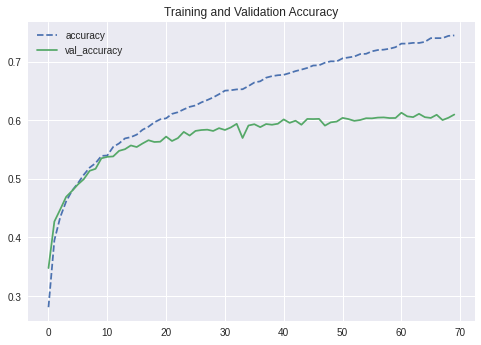

In [35]:
plt.style.use('seaborn')
plt.plot(hist.history['accuracy'],'--', label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

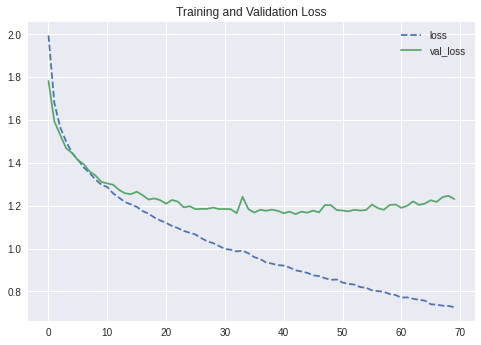

In [36]:
plt.style.use('seaborn')
plt.plot(hist.history['loss'],'--', label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.legend()

In [ ]:
#Convertendo para escala de cinza

In [37]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [38]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
#Convertendo os valores de cores para escala de cinza
X_train_gray = np.sum(X_train / 3, axis=3, keepdims = True)
X_test_gray = np.sum(X_test / 3, axis=3, keepdims = True)


<Figure size 576x396 with 0 Axes>

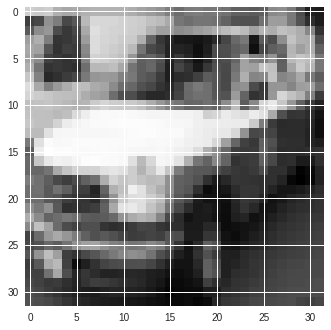

<Figure size 576x396 with 0 Axes>

In [39]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()

In [40]:
X_train_gray_norm, X_test_gray_norm = X_train_gray/255, X_test_gray/255


/home/dsntos/.local/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


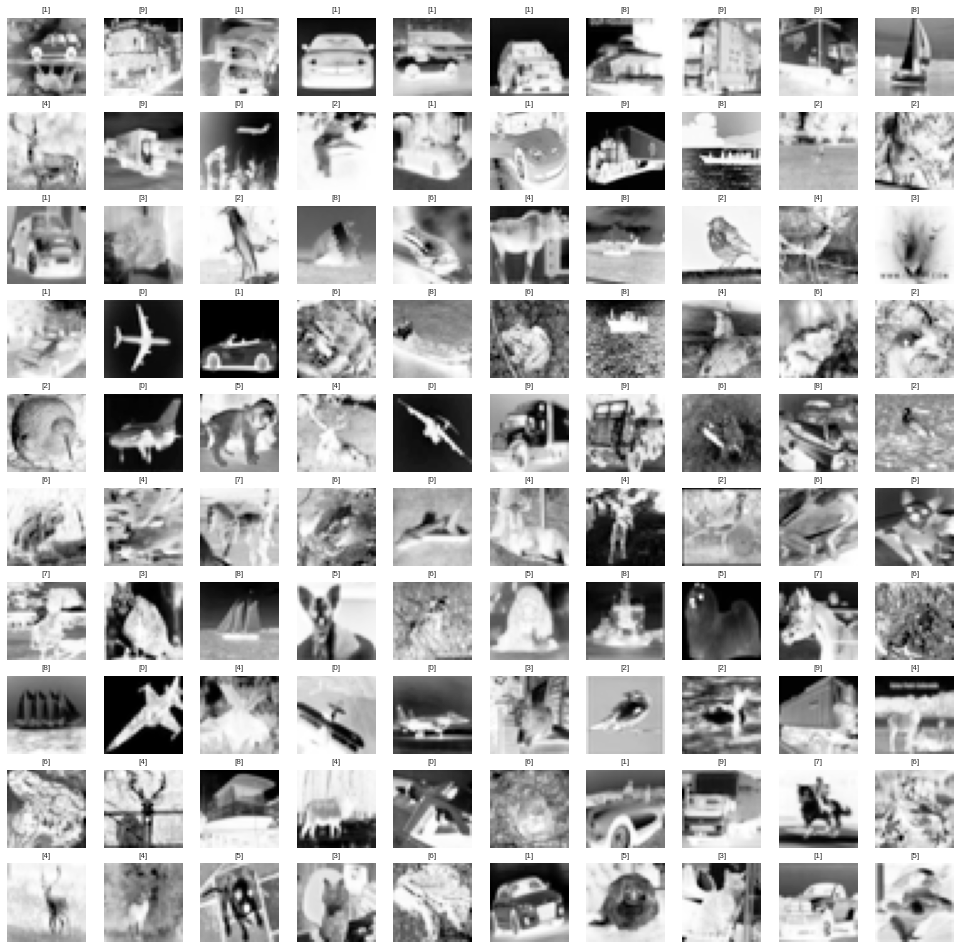

In [41]:
w_grid, l_grid = 10, 10
fig, axes = plt.subplots(l_grid, w_grid, figsize=(17,17))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, w_grid * l_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train_gray_norm[index])
    axes[i].set_title(y_train[index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.2)

In [42]:
#criando o modelo
from tensorflow.keras import layers, models

lenet_gray = models.Sequential()

lenet_gray.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1)))
lenet_gray.add(layers.AveragePooling2D())

lenet_gray.add(layers.Conv2D(16, (5,5), activation='relu'))
lenet_gray.add(layers.AveragePooling2D())

lenet_gray.add(layers.Flatten())

lenet_gray.add(layers.Dense(120, activation='relu'))
lenet_gray.add(layers.Dense(84, activation='relu'))
lenet_gray.add(layers.Dense(10, activation='softmax'))

lenet_gray.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_25 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_26 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_10 (Dense)             (None, 84)              

In [44]:
lenet_gray.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [45]:
hist = lenet_gray.fit(X_train_gray_norm, y_train, 
                batch_size=500, epochs=30,
                validation_data=(X_test_gray_norm, y_test))

Epoch 1/30
100/100 [==============================] - 5s 47ms/step - loss: 2.0877 - accuracy: 0.2338 - val_loss: 1.9297 - val_accuracy: 0.3189
Epoch 2/30
100/100 [==============================] - 5s 45ms/step - loss: 1.8134 - accuracy: 0.3550 - val_loss: 1.7101 - val_accuracy: 0.3985
Epoch 3/30
100/100 [==============================] - 5s 45ms/step - loss: 1.6807 - accuracy: 0.4035 - val_loss: 1.6285 - val_accuracy: 0.4183
Epoch 4/30
100/100 [==============================] - 4s 45ms/step - loss: 1.6073 - accuracy: 0.4283 - val_loss: 1.5722 - val_accuracy: 0.4320
Epoch 5/30
100/100 [==============================] - 4s 45ms/step - loss: 1.5605 - accuracy: 0.4440 - val_loss: 1.5544 - val_accuracy: 0.4435
Epoch 6/30
100/100 [==============================] - 5s 45ms/step - loss: 1.5169 - accuracy: 0.4605 - val_loss: 1.5032 - val_accuracy: 0.4612
Epoch 7/30
100/100 [==============================] - 5s 46ms/step - loss: 1.4802 - accuracy: 0.4739 - val_loss: 1.4687 - val_accuracy: 0.4707

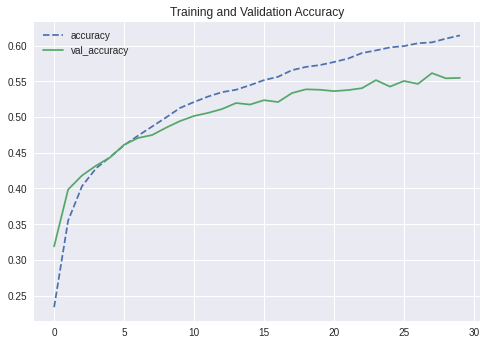

In [46]:
plt.style.use('seaborn')
plt.plot(hist.history['accuracy'],'--', label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

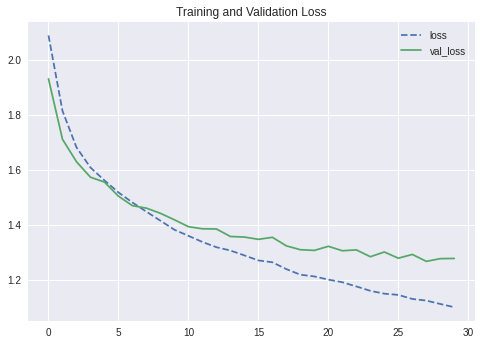

In [47]:
plt.style.use('seaborn')
plt.plot(hist.history['loss'],'--', label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.legend()

In [48]:
X_train_gray_norm, X_test_gray_norm = (X_train_gray - 128) / 128, (X_test_gray - 128) / 128


In [49]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
#Convertendo os valores de cores para escala de cinza
X_train_gray = np.sum(X_train / 3, axis=3, keepdims = True)
X_test_gray = np.sum(X_test / 3, axis=3, keepdims = True)


In [50]:
#criando o modelo
from tensorflow.keras import layers, models

lenet_gray = models.Sequential()

lenet_gray.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1)))
lenet_gray.add(layers.AveragePooling2D())

lenet_gray.add(layers.Conv2D(16, (5,5), activation='relu'))
lenet_gray.add(layers.AveragePooling2D())

lenet_gray.add(layers.Flatten())

lenet_gray.add(layers.Dense(120, activation='relu'))
lenet_gray.add(layers.Dense(84, activation='relu'))
lenet_gray.add(layers.Dense(10, activation='softmax'))

lenet_gray.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_27 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_28 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_13 (Dense)             (None, 84)              

In [51]:
lenet_gray.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [52]:
hist = lenet_gray.fit(X_train_gray_norm, y_train, 
                batch_size=500, epochs=40,
                validation_data=(X_test_gray_norm, y_test))

Epoch 1/40
100/100 [==============================] - 5s 48ms/step - loss: 1.9821 - accuracy: 0.2853 - val_loss: 1.7596 - val_accuracy: 0.3726
Epoch 2/40
100/100 [==============================] - 5s 46ms/step - loss: 1.6930 - accuracy: 0.4017 - val_loss: 1.6377 - val_accuracy: 0.4152
Epoch 3/40
100/100 [==============================] - 5s 46ms/step - loss: 1.6029 - accuracy: 0.4335 - val_loss: 1.5851 - val_accuracy: 0.4337
Epoch 4/40
100/100 [==============================] - 5s 46ms/step - loss: 1.5332 - accuracy: 0.4564 - val_loss: 1.5407 - val_accuracy: 0.4500
Epoch 5/40
100/100 [==============================] - 5s 47ms/step - loss: 1.4828 - accuracy: 0.4762 - val_loss: 1.4897 - val_accuracy: 0.4732
Epoch 6/40
100/100 [==============================] - 5s 46ms/step - loss: 1.4413 - accuracy: 0.4925 - val_loss: 1.4576 - val_accuracy: 0.4811
Epoch 7/40
100/100 [==============================] - 5s 47ms/step - loss: 1.4048 - accuracy: 0.5058 - val_loss: 1.4306 - val_accuracy: 0.4945

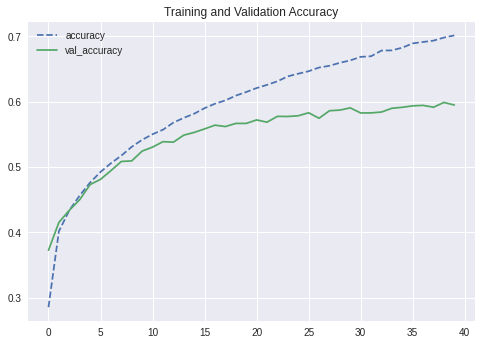

In [53]:
plt.style.use('seaborn')
plt.plot(hist.history['accuracy'],'--', label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

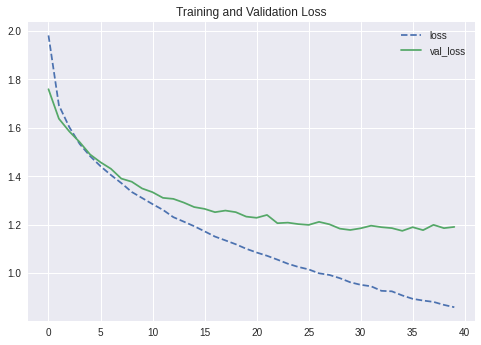

In [54]:
plt.style.use('seaborn')
plt.plot(hist.history['loss'],'--', label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.legend()

### other model

In [90]:
#criando o modelo

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(1024, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_146 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)        

In [93]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [94]:
hist = lenet_gray.fit(X_train_gray_norm, y_train, 
                batch_size=512, epochs=100,
                validation_data=(X_test_gray_norm, y_test))

Epoch 1/100
98/98 [==============================] - 5s 46ms/step - loss: 0.3610 - accuracy: 0.8771 - val_loss: 1.9589 - val_accuracy: 0.5874
Epoch 2/100
98/98 [==============================] - 5s 47ms/step - loss: 0.3634 - accuracy: 0.8752 - val_loss: 1.9833 - val_accuracy: 0.5802
Epoch 3/100
98/98 [==============================] - 5s 47ms/step - loss: 0.3595 - accuracy: 0.8760 - val_loss: 1.9954 - val_accuracy: 0.5880
Epoch 4/100
98/98 [==============================] - 5s 48ms/step - loss: 0.3504 - accuracy: 0.8803 - val_loss: 2.0058 - val_accuracy: 0.5849
Epoch 5/100
98/98 [==============================] - 5s 48ms/step - loss: 0.3544 - accuracy: 0.8799 - val_loss: 2.0007 - val_accuracy: 0.5804
Epoch 6/100
98/98 [==============================] - 5s 47ms/step - loss: 0.3505 - accuracy: 0.8800 - val_loss: 2.0475 - val_accuracy: 0.5839
Epoch 7/100
98/98 [==============================] - 5s 47ms/step - loss: 0.3444 - accuracy: 0.8818 - val_loss: 2.0451 - val_accuracy: 0.5850
Epoch 

98/98 [==============================] - 5s 46ms/step - loss: 0.2040 - accuracy: 0.9317 - val_loss: 3.1678 - val_accuracy: 0.5674
Epoch 59/100
98/98 [==============================] - 4s 45ms/step - loss: 0.1989 - accuracy: 0.9331 - val_loss: 3.1792 - val_accuracy: 0.5702
Epoch 60/100
98/98 [==============================] - 5s 46ms/step - loss: 0.1916 - accuracy: 0.9369 - val_loss: 3.2146 - val_accuracy: 0.5703
Epoch 61/100
98/98 [==============================] - 5s 46ms/step - loss: 0.1919 - accuracy: 0.9364 - val_loss: 3.2391 - val_accuracy: 0.5741
Epoch 62/100
98/98 [==============================] - 4s 46ms/step - loss: 0.1910 - accuracy: 0.9357 - val_loss: 3.2573 - val_accuracy: 0.5679
Epoch 63/100
98/98 [==============================] - 5s 47ms/step - loss: 0.1808 - accuracy: 0.9406 - val_loss: 3.2881 - val_accuracy: 0.5714
Epoch 64/100
98/98 [==============================] - 5s 48ms/step - loss: 0.1866 - accuracy: 0.9371 - val_loss: 3.2883 - val_accuracy: 0.5682
Epoch 65/100